# Part I -  Ford GoBike Dataset Exploration
## by Abderrahmen Mansour
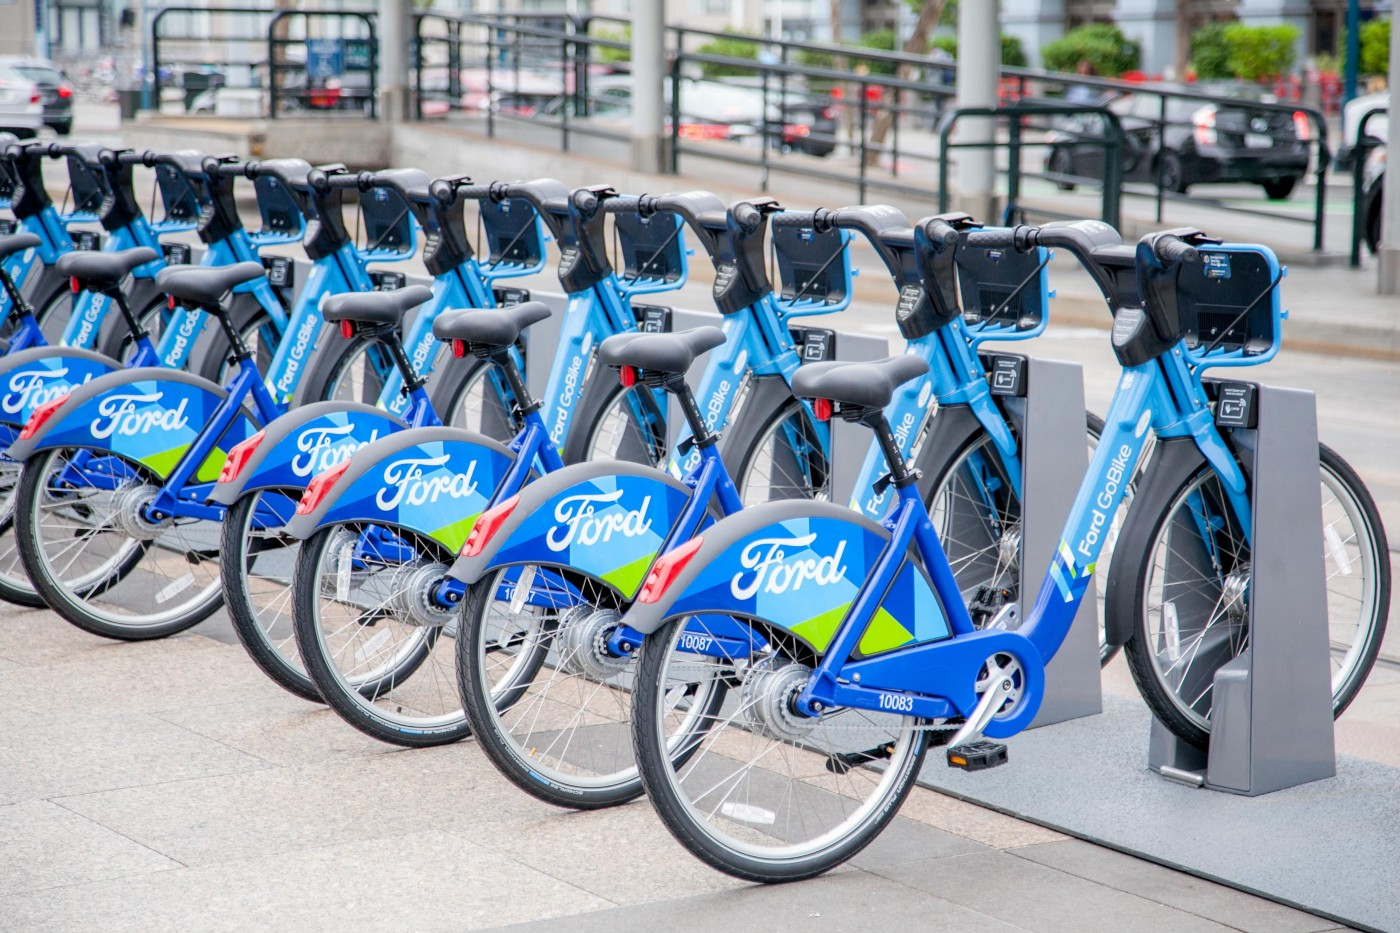

## Table of Contents
- [Introduction](#intro)
- [Data Wrangling](#wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusions](#conclusion)

## Introduction
<a id='intro'></a>

This dataset contains information about individual trips in a bike share system that covers the greater San Francisco Bay area.

*Note* that this dataset needs some data processing so that it can be cleaned up for analysis. The linked system covers multiple cities, and multiple data files will need to be merged if full year coverage is desired. If you are adventurous, you can try adding analysis from other cities by following the links on [this page](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems).




# Data Wrangling
<a id='wrangling'></a>

In [25]:
# import all packages and set plots to be embedded inline
from requests import get
from zipfile import ZipFile
from io import StringIO, BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as ms
%matplotlib inline

> At the beginning of the project, I will load the dataset and then describe its characteristics using the following questions. This will help motivate me to achieve my research goals.

> After that, I will take care of cleaning up any quality or order problems of the dataset before proceeding with the analysis.

In [4]:
#Download the fordgobike dataset from the Udacity provided link
url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'
data_csv = get(url)
data_csv
#<Response [200]> = Success

<Response [200]>

In [5]:
#Store the downloaded data in a csv file and verify it
df = pd.read_csv(StringIO(data_csv.content.decode('utf-8')))
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [46]:
Bike_clean.shape

(174952, 19)

### What is the structure of your dataset?


> The dataset contains 183412 rows and 16 columns.
> After cleaning the dataset, I now have 174952 rows and 19 columns, which will be saved as a new data frame named " Bike_clean " ( this is the dataset which I will use for the analysis).

### What is/are the main feature(s) of interest in your dataset?

> The most important features are  `start_time`, `duration_sec` and `user_type` , as I want to know when most trips were made in terms of time of day and day of week, how long the average trip lasts and how it affects the user type - subscriber or customer.
> - **Note that:** After cleaning the dataset, `start_time` now becomes three columns, namely `start_time(hr)`, `start_day` and `start_month`. Then the column `start_time` is deleted (this can be seen in the data frame `Bike_clean`, the data set used for the analysis). Statistics about gender and age may also show the most popular groups that tend to cycle.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will also look at `member_gender`, `user_type` and `age` (age is extracted from `member_birth_year`) to examine how gender and age affect the main features.


##### After dealing with the features of interest and visually assessing the data, it becomes clear that additional wrangling is required to archive the intended results. I will do this following the wrangling process:

> * Programmatic evaluation of the data to find quality and order problems.
> * Data Cleaning  according to the Define, Code and Test step.


### Programmatic Evaluation

In [11]:
#Check the size of the data (rows,columns)
df.shape

(183412, 16)

In [10]:
#Explore the column information to see if there are null values and incorrect data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [12]:
#Show the sum of null entries for each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [16]:
#Verify if the data contains duplicate rows
df.duplicated().sum()

0

In [13]:
# describe the data to generate descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Data Cleaning 

### Quality Issues
 - Delete Missing values in start_station_name, start_station_id,end_station_id,end_station_name, member_birth_year and member_gender columns
 - start_time and end_time objects to datetime64
 - start_station_latitude float64
 - start_station_longitude float64
 - end_station_latitude float64
 - end_station_longitude float64
 - user_type and member_gender to Categorical Value
 - member_birth_year float64 to int64.


### Tidiness Issues
 - Split start_time into three(3) columns `start_time(hr)`, `start_day` and `start_month`. Then drop start_time
 - Add new column `age` extract from member_birth_year
 

In [212]:
#Make a copy of the dataset
Bike_clean = df.copy()

#### Define: Delete  missing values in: 
> - **start_station_name**
> - **member_birth_year**
> - **member_gender columns**

#### Code

In [213]:
#Remove missing values.
Bike_clean.dropna(subset=['start_station_name','member_birth_year','start_station_id','end_station_id','end_station_name','member_gender'], inplace = True)

#### Test

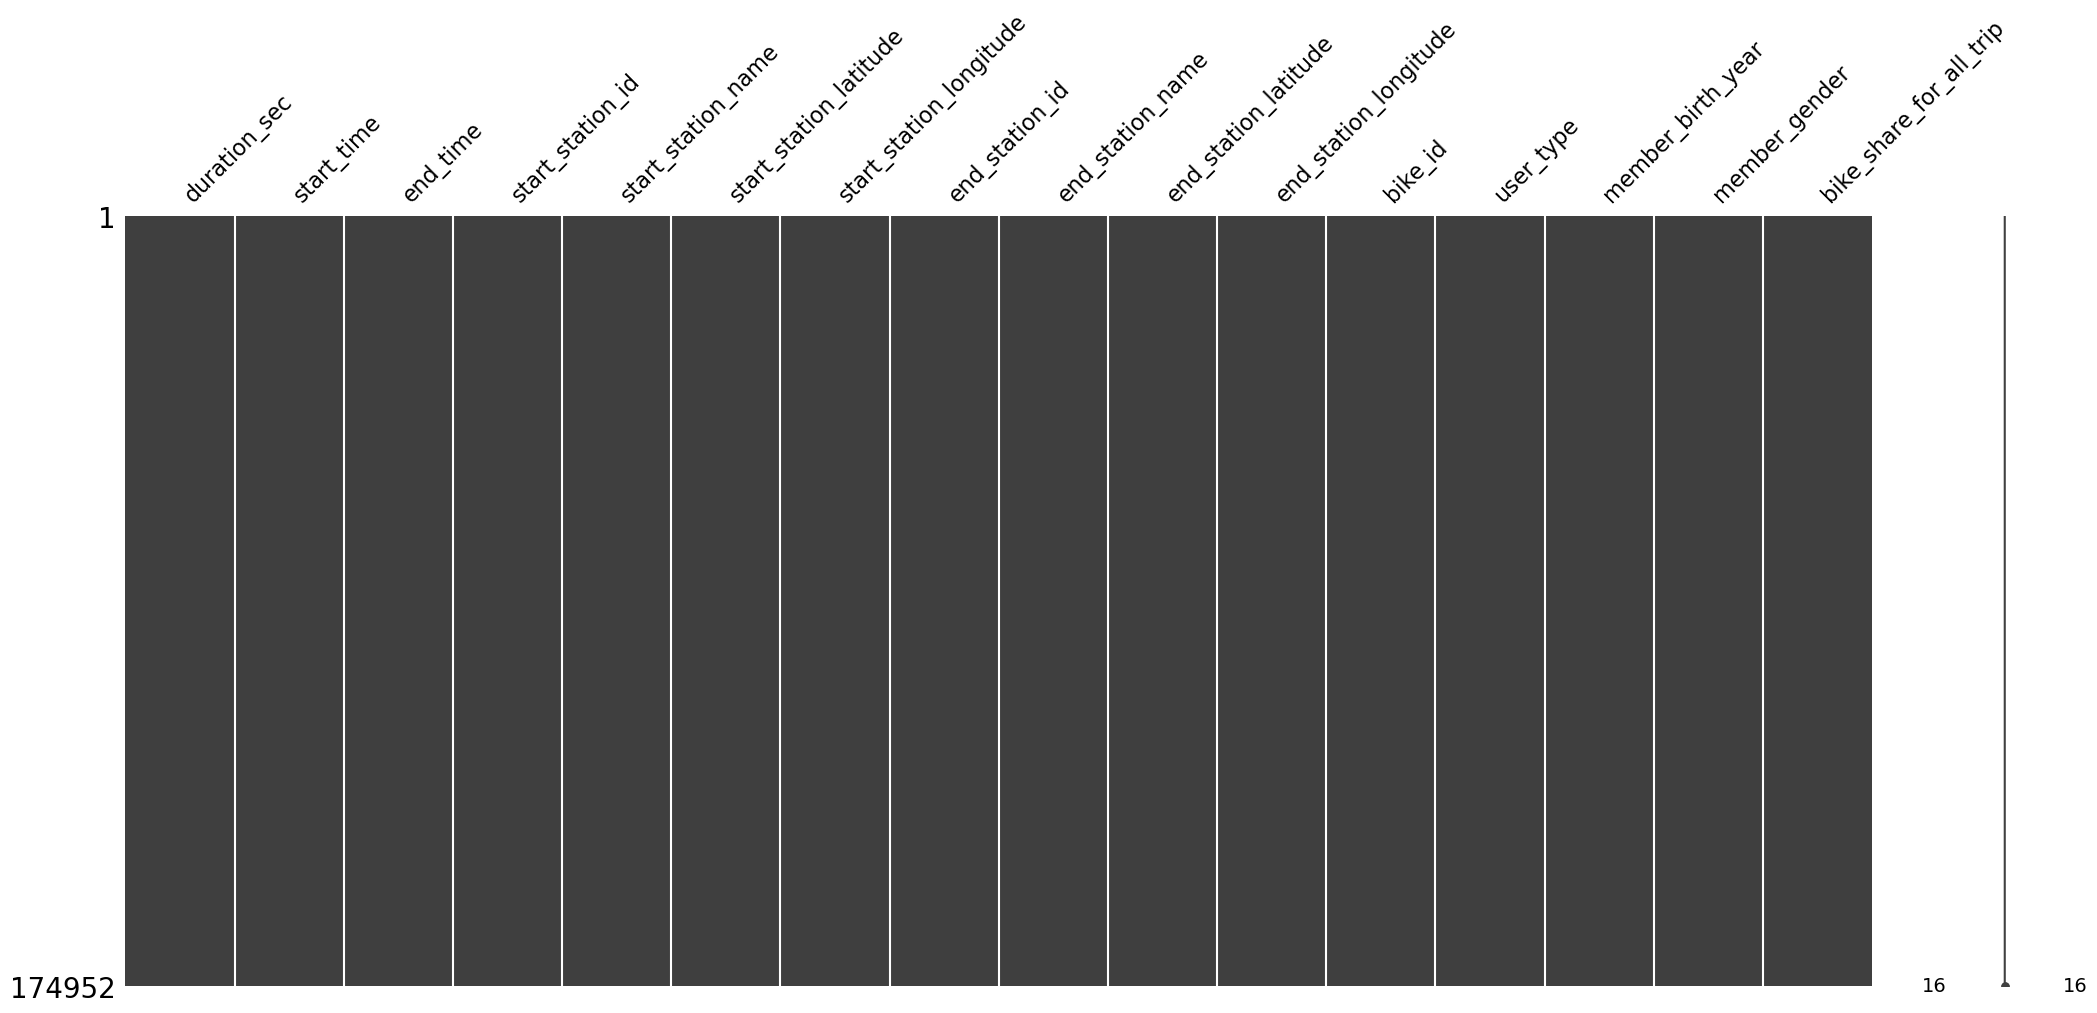

In [214]:
#Verify data cleaning
ms.matrix(Bike_clean);

In [215]:
Bike_clean.isna().sum().sum()

0

#### Define: 
> - **start_time and end_time objects to datetime64**
> - **start_station_latitude float64**
> - **start_station_longitude float64**
> - **end_station_latitude float64**
> - **end_station_longitude float64**
> - **user_type and member_gender to Categorical Value**
> - **member_birth_year float64 to int64.**

#### Code

In [216]:
#Converting datatypes
datatype = {'start_time': 'datetime64', 'end_time': 'datetime64','start_station_latitude':'float64','start_station_longitude':'float64',
            'end_station_latitude':'float64','end_station_longitude':'float64','user_type': 'category', 'member_gender': 'category',
            'member_birth_year': 'int'}
Bike_clean = Bike_clean.astype(datatype)

#### Test

In [217]:
print(Bike_clean.shape)
Bike_clean.info()

(174952, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  use

### Define: 
> - **Split start_time into three(3) columns start_time(hr), start_day and start_month. Then drop start_time**

#### Code

In [218]:
#Creating new columns for start_time and then drop the column
Bike_clean['start_time(hr)'] = Bike_clean['start_time'].dt.hour
Bike_clean['start_day'] = Bike_clean['start_time'].dt.day_name()
Bike_clean['start_month'] = Bike_clean['start_time'].dt.month_name()

Bike_clean.drop('start_time', axis = 1, inplace = True)

#### Test

In [219]:
#show first 5 rows of the dataframe
Bike_clean.head()

,duration_sec,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time(hr),start_day,start_month
0,52185,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17,Thursday,February
2,61854,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12,Thursday,February
3,36490,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17,Thursday,February
4,1585,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23,Thursday,February
5,1793,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23,Thursday,February


### Define: Add new column `age` extract from member_birth_year

#### Code

In [220]:
#Extract the age from the member's birth year using the year 2019, since the data was collected in 2019
Bike_clean['age'] =  Bike_clean["member_birth_year"].apply(lambda x: 2019 - int(x))
#Bike_clean['age'] = 2019 - Bike_clean.member_birth_year

#### Test

In [222]:
# Show the first 5 Ages
Bike_clean.age.head(), Bike_clean.age.describe()

(0    35
 2    47
 3    30
 4    45
 5    60
 Name: age, dtype: int64,
 count    174952.000000
 mean         34.196865
 std          10.118731
 min          18.000000
 25%          27.000000
 50%          32.000000
 75%          39.000000
 max         141.000000
 Name: age, dtype: float64)

In [113]:
Bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  float64       
 3   start_station_name       174952 non-null  object        
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  float64       
 7   end_station_name         174952 non-null  object        
 8   end_station_latitude     174952 non-null  float64       
 9   end_station_longitude    174952 non-null  float64       
 10  bike_id                  174952 non-null  int64         
 11  user_type                174952 non-null  category      
 12  member_birth_yea

## Univariate Exploration



> Let's first look at the distributions of our main features `start_time(hr)`, `start_day`, `start_month`, `duration_sec`, and `user_type`.
>Then we will also look at  `member_gender`, and `age`.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### At which time does the Trips start?

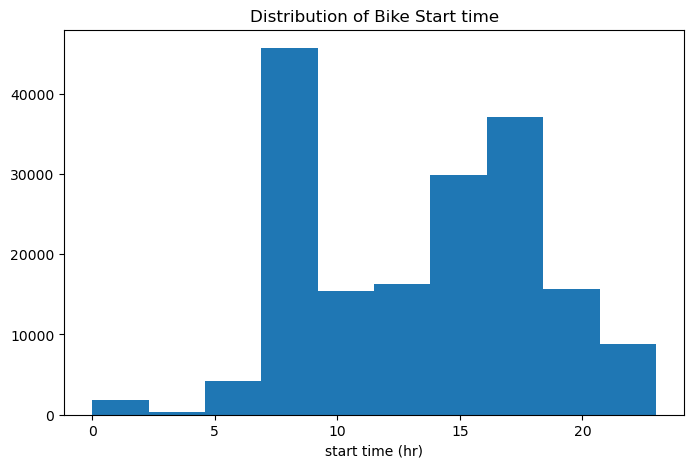

In [114]:
#Distribution of Hours
plt.figure(figsize=[8, 5])
plt.hist(data = Bike_clean, x = 'start_time(hr)')
plt.xlabel('start time (hr)')
plt.title('Distribution of Bike Start time');

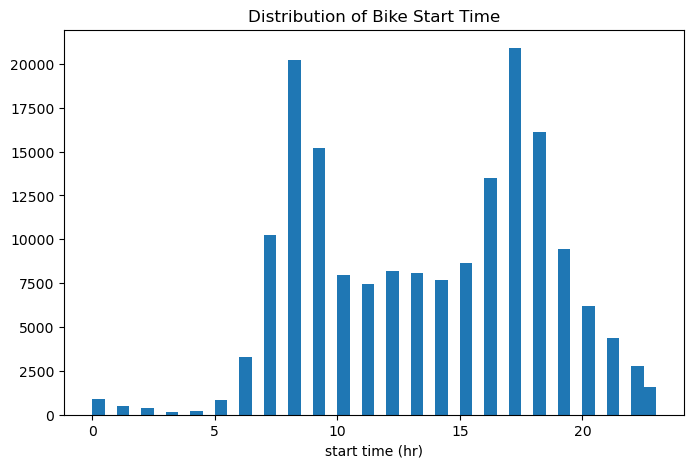

In [115]:
# Let's define An Other  binsize to distribute the data and get a better Overview

binsize = 0.5
bins = np.arange(0, Bike_clean['start_time(hr)'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = Bike_clean, x = 'start_time(hr)', bins = bins)
plt.xlabel('start time (hr)')
plt.title('Distribution of Bike Start Time')
plt.show();

From the above graph, we can clearly conclude that most of the trips occur between 7, 8, 9 and 16, 17, 18 o'clock, with the highest value at 17 and 8 o'clock. We can also see that there are some riders between 0 and 4 o'clock. In addition, some riders are in the period between 10 pm and 11 pm.

### On which days are the trips made?

In [119]:
#  Convert Bike_clean.start_day from Object to Category
Ordered_Days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Bike_clean['start_day'] = Bike_clean['start_day'].astype( pd.api.types.CategoricalDtype(ordered = True, categories = Ordered_Days))

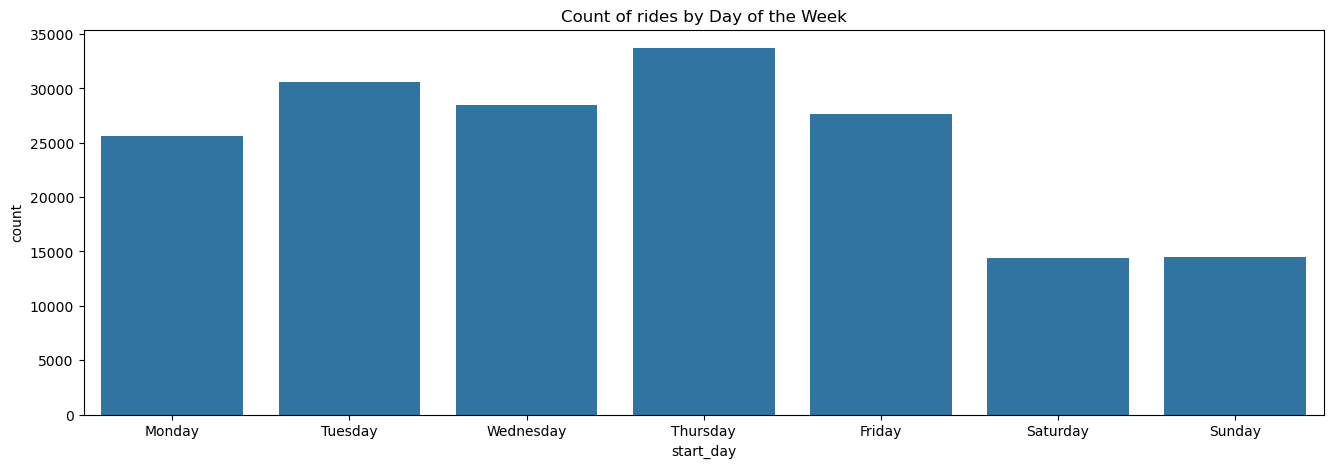

In [118]:
#Distribution of start_day
fig, ax = plt.subplots(figsize = (16,5)) 
sb.countplot(x = "start_day", data = Bike_clean, color  = sb.color_palette()[0]);
plt.title("Count of rides by Day of the Week");

Most trips were made on weekdays, with Thursday being the most frequent day, followed by Tuesday. Weekends are also infrequent, with Saturday and Sunday having the lowest number of riders.

### On which months are the trips made?

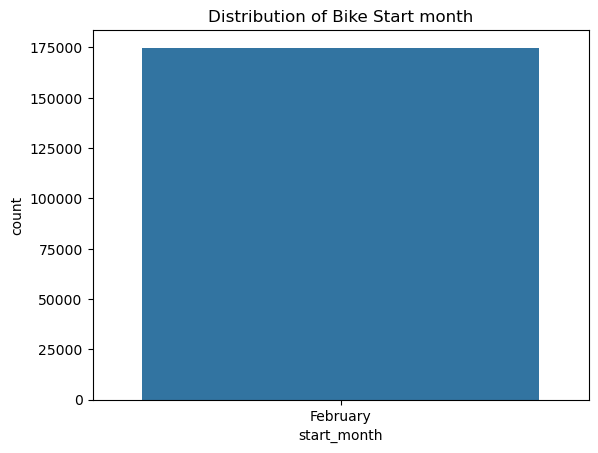

In [120]:
#Distribution of start_month
sb.countplot(data = Bike_clean, x = 'start_month')
plt.title('Distribution of Bike Start month');

All the trip were made in February

### How long did the trips take?

In [128]:
# dome infos about Trip duration 
Bike_clean.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

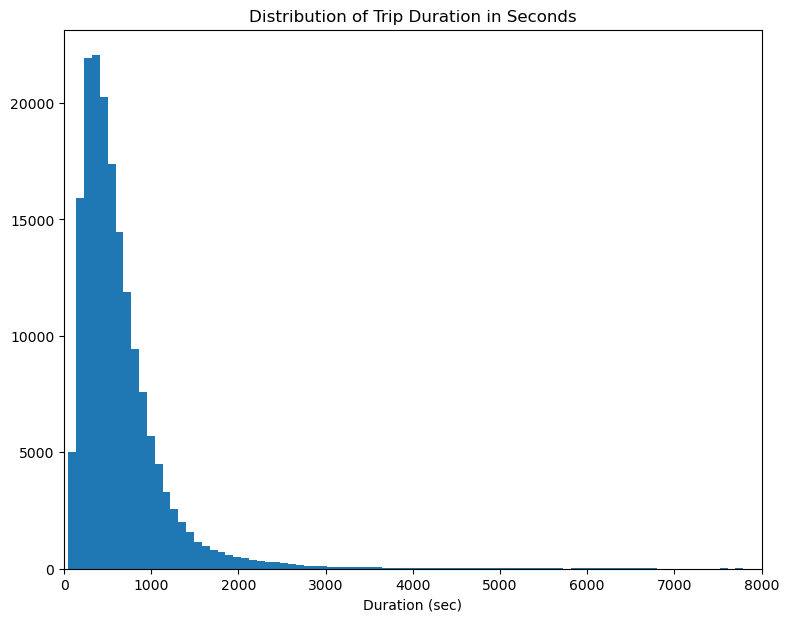

In [134]:
#Distribution of Trip duration in Seconds
binsize = 90
bins = np.arange(50, Bike_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[9, 7])
plt.hist(data = Bike_clean, x = 'duration_sec', bins = bins)
plt.xlim([0, 8000])
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration in Seconds');

The graph is sloped to the left, and it appears that most of the runs lasted between 300 and 800 seconds, but there is a long tail from 2000 down, let's plot this on a logarithmic scale to review all the data.

In [285]:
df = Bike_clean
df["duration_min"] = Bike_clean.duration_sec/60

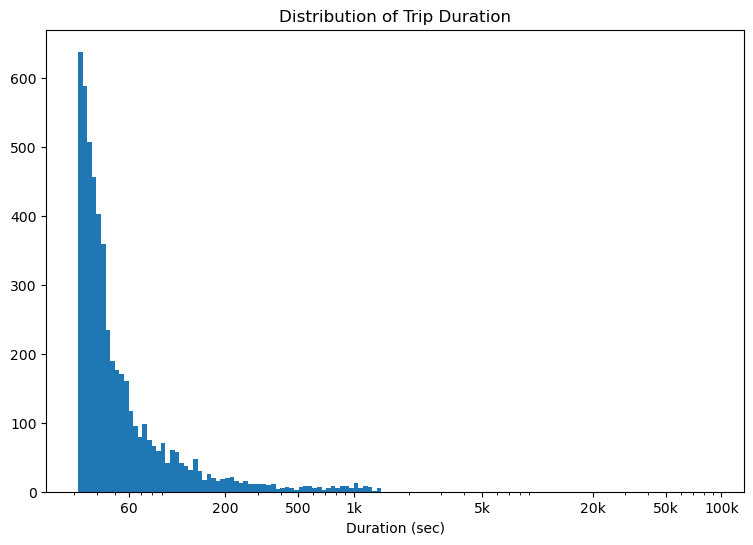

In [286]:
# Let's visualize it on a logarithmic scale.
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(Bike_clean['duration_sec'].max())+log_binsize, log_binsize)
x = Bike_clean.duration_sec/60
plt.figure(figsize=[9, 6])
plt.hist(data = df, x = "duration_min" , bins = bins)
plt.xscale('log')
plt.xticks([60, 2e2, 5e2, 1e3, 5e3, 2e4, 5e4, 1e5], [60, '200', '500', '1k', '5k', '20k', '50k', '100k'])
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration');

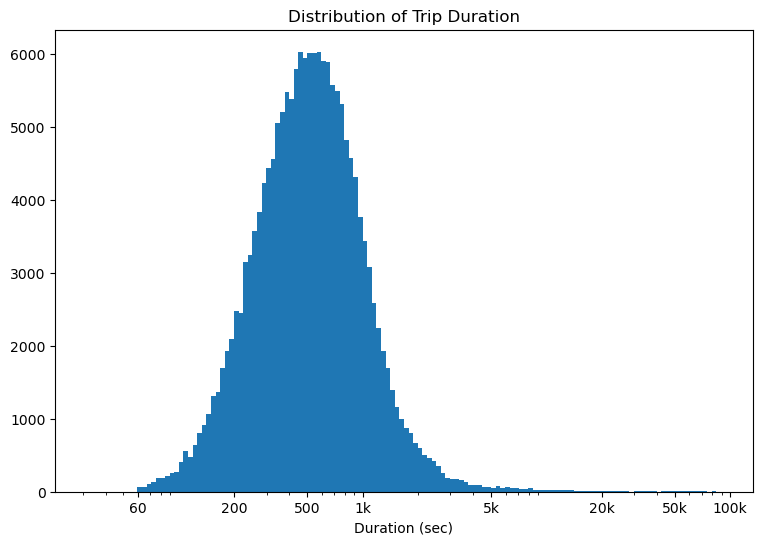

In [260]:
# Let's visualize it on a logarithmic scale.
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(Bike_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[9, 6])
plt.hist(data = Bike_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([60, 2e2, 5e2, 1e3, 5e3, 2e4, 5e4, 1e5], [60, '200', '500', '1k', '5k', '20k', '50k', '100k'])
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Duration');

According to the distribution of the data, it is evident that most of the trips lasted between 300 and 900 seconds, with a peak at 500 seconds and a decreasing end at 3000 down to about 80000 seconds.

### what types of users have made trips?

In [234]:
Bike_clean.user_type.value_counts().index

CategoricalIndex(['Subscriber', 'Customer'], categories=['Customer', 'Subscriber'], ordered=False, dtype='category')

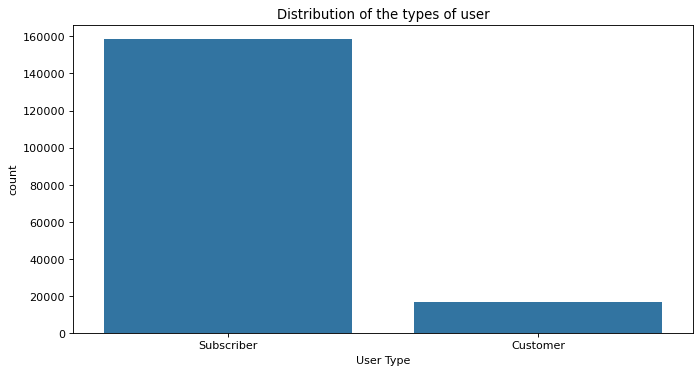

In [259]:
#Distribution of user_type
fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
sb.countplot(data = Bike_clean, x = 'user_type', order =Bike_clean.user_type.value_counts().index,color = sb.color_palette()[0])

plt.title("Users By Type");
plt.xlabel("User Type");
plt.title('Distribution of the types of user');

From the above chart, there are about 150000+ subscribers and the customers are less than 20000.

### How are the riders gender distributed ?

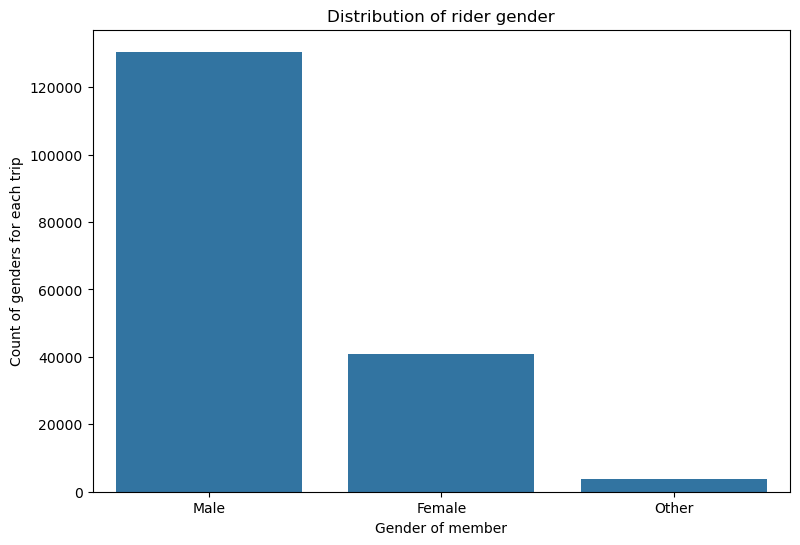

In [238]:
#Distribution of member_gender
plt.figure(figsize=[9, 6])
sb.countplot(data = Bike_clean, x = 'member_gender',order = Bike_clean.member_gender.value_counts().index,color = sb.color_palette()[0])
plt.title('Distribution of rider gender');
plt.xlabel("Gender of member");
plt.ylabel("Count of genders for each trip");

In [184]:
#function to plot a piechart
def pie_Chart(values, labels, title, explode):
    
    explode = explode
    plt.pie(values ,explode=explode,counterclock=False, shadow=False, autopct='%1.1f%%')
    plt.title(title)
    plt.legend(labels, loc='center left', bbox_to_anchor=(1.5, 0.5))
    plt.show()

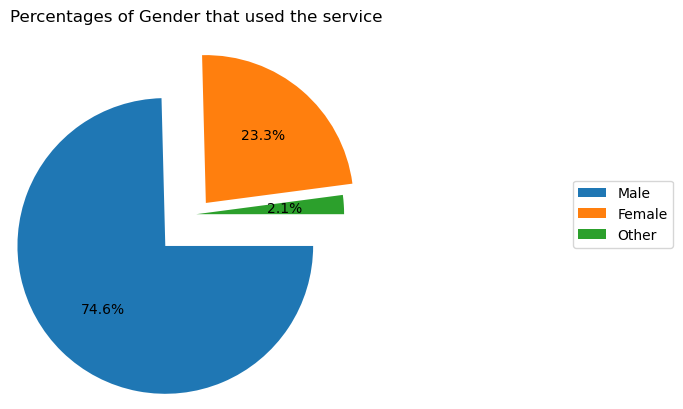

In [185]:
#plot piechart of Most counted Distances in km using function
sorted_gender = Bike_clean.member_gender.value_counts().sort_values(ascending=False)
title = 'Percentages of Gender that used the service'
explode = (0.3, 0.1, 0)
pie_Chart(sorted_gender.values, sorted_gender.index, title, explode)

Almost 75% of the trips are made by men, women are just over 20% and others only 2% of rides

### How old are the Riders?

In [242]:
# Some infos about Bike_clean.age
Bike_clean.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

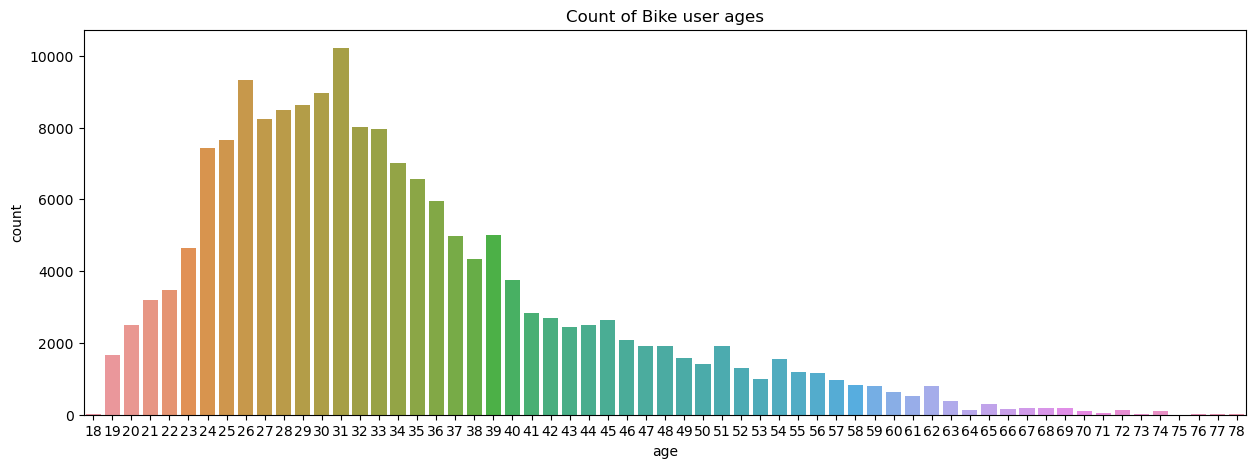

In [243]:
#Overview of the distribution of ages so that an optimal Bins will be chosen 
fig, ax = plt.subplots(figsize = (15,5), dpi = 100)
color = sb.color_palette("cividis_r")
sb.countplot(x = "age", data = Bike_clean.query("age < 80").sort_values("age"));
plt.title("Count of Bike user ages");

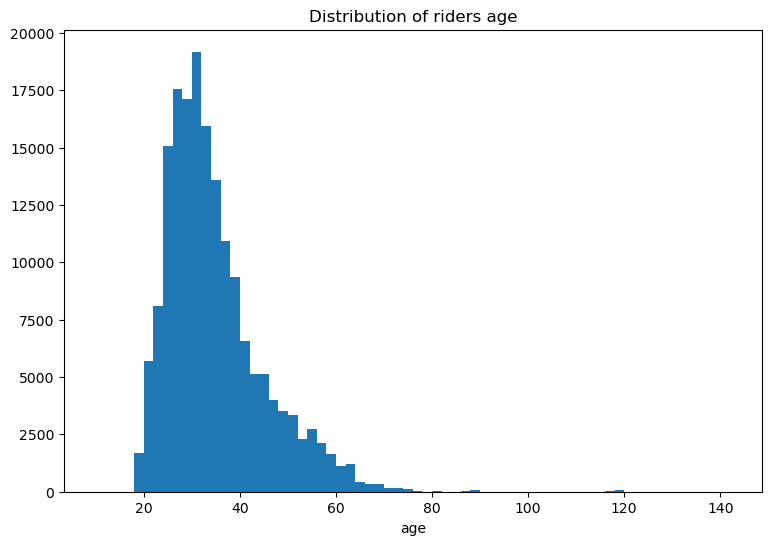

In [244]:
#plot histogram of Distribution of age
binsize = 2
bins = np.arange(10, Bike_clean['age'].max()+binsize, binsize)

plt.figure(figsize=[9, 6])
plt.hist(data = Bike_clean, x = 'age', bins = bins)
plt.xlabel('age')
plt.title('Distribution of riders age')
plt.show();

It looks that most drivers are between 30 and 40 years old, let's place this on a logical scale

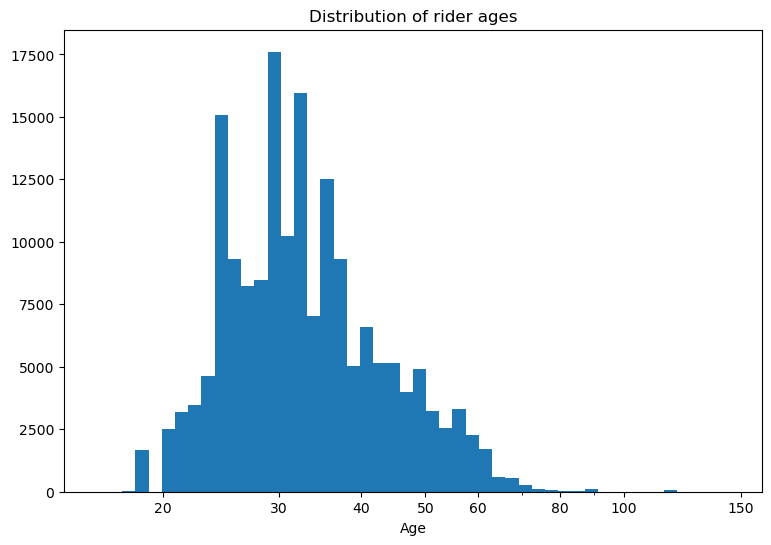

In [211]:
#log scale for age
log_binsize = 0.020
bins = 10 ** np.arange(1.2, np.log10(Bike_clean['age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[9, 6])
plt.hist(data = Bike_clean, x = 'age', bins = bins)
plt.xscale('log')
plt.xticks([20, 3e1, 4e1, 5e1, 6e1, 8e1, 1e2, 1.5e2], [20, '30', '40', '50', '60', '80', '100', '150'])
plt.xlabel('Age')
plt.title('Distribution of rider ages');

Most drivers are between 23 and 28 and 30 and 35 years old, but there is also one driver who is over 100 years old. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * Most trips were made between 7 and 9 a.m and between 4 and 6 p.m., with most trips on 5 p.m. following 8 p.m.. Otherwise, there are less riders in the period between 10 pm and 11 pm or between 0 and 4 am.
> * Most common day, followed by Tuesday. Weekends are also infrequent, since Saturday and Sunday have the lowest number of riders.
> * Most trips lasted between 300 and 900 seconds, with a peak of 500 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

